In [1]:
import os
import sys

import matplotlib.pyplot as plt
from hydra import initialize, compose
from pyHalo.preset_models import CDM
from glob import glob
import pickle
import numpy as np

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses import lens_util
from mejiro.plots import plot

In [2]:
lens_dir = os.path.join('/data', 'bwedig', 'roman-population', 'data', 'lenses')
lens_paths = glob(lens_dir + '/*')

In [3]:
lens_list = [lens_util.unpickle_lens(i, uid=None) for i in lens_paths]

In [4]:
array_list = [i.get_array(num_pix=45, side=4.95) for i in lens_list]

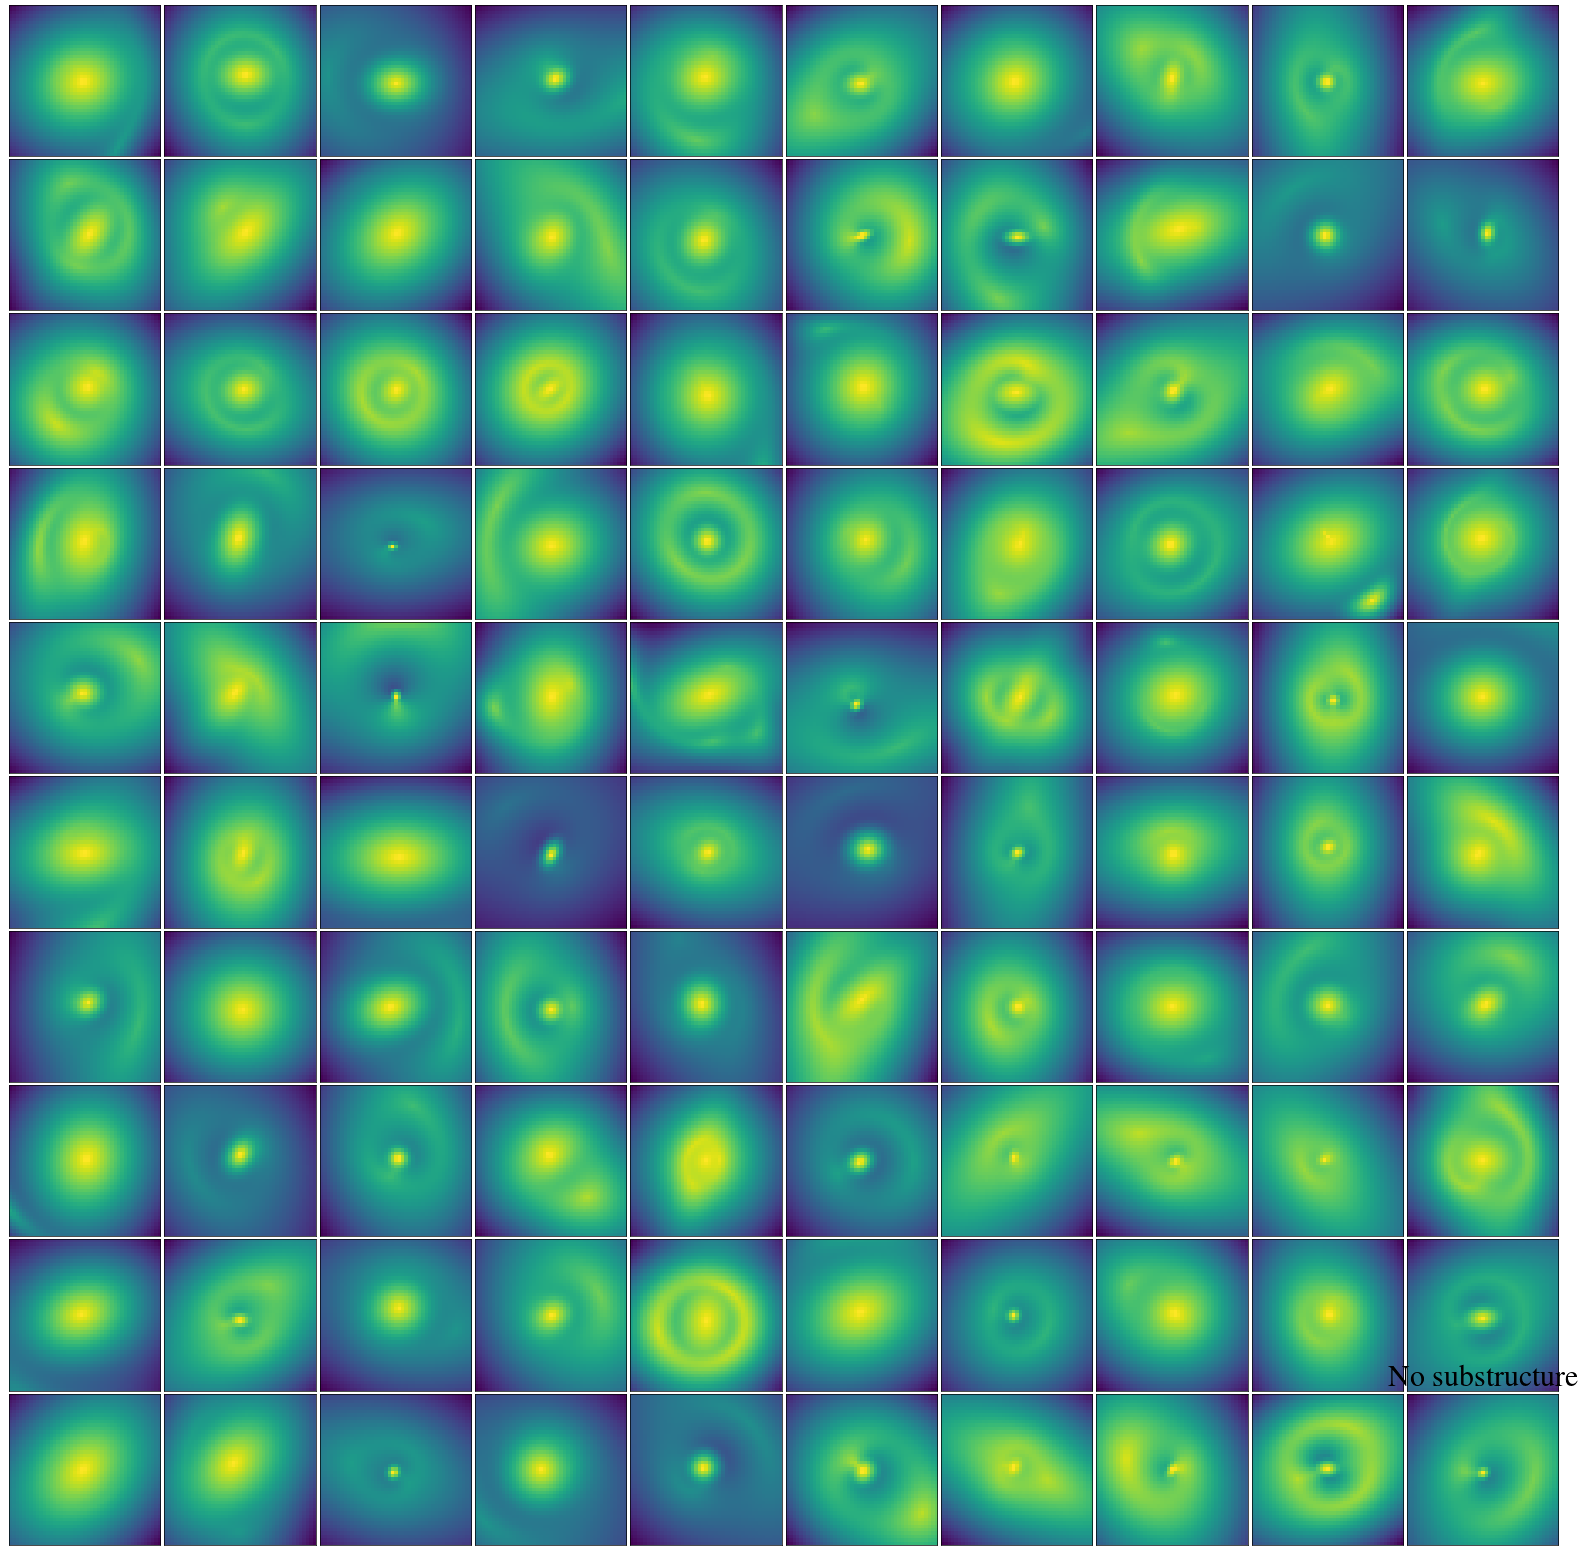

In [5]:
plot.plot_grid(array_list[:100], side=10, log10=True, title='No substructure')

In [6]:
# open pickled lens dict list
with open(os.path.join(pickle_dir, '03_skypy_output_lens_list_models'), 'rb') as results_file:
    dict_list = pickle.load(results_file) 

model_list = [i['model'] for i in dict_list]

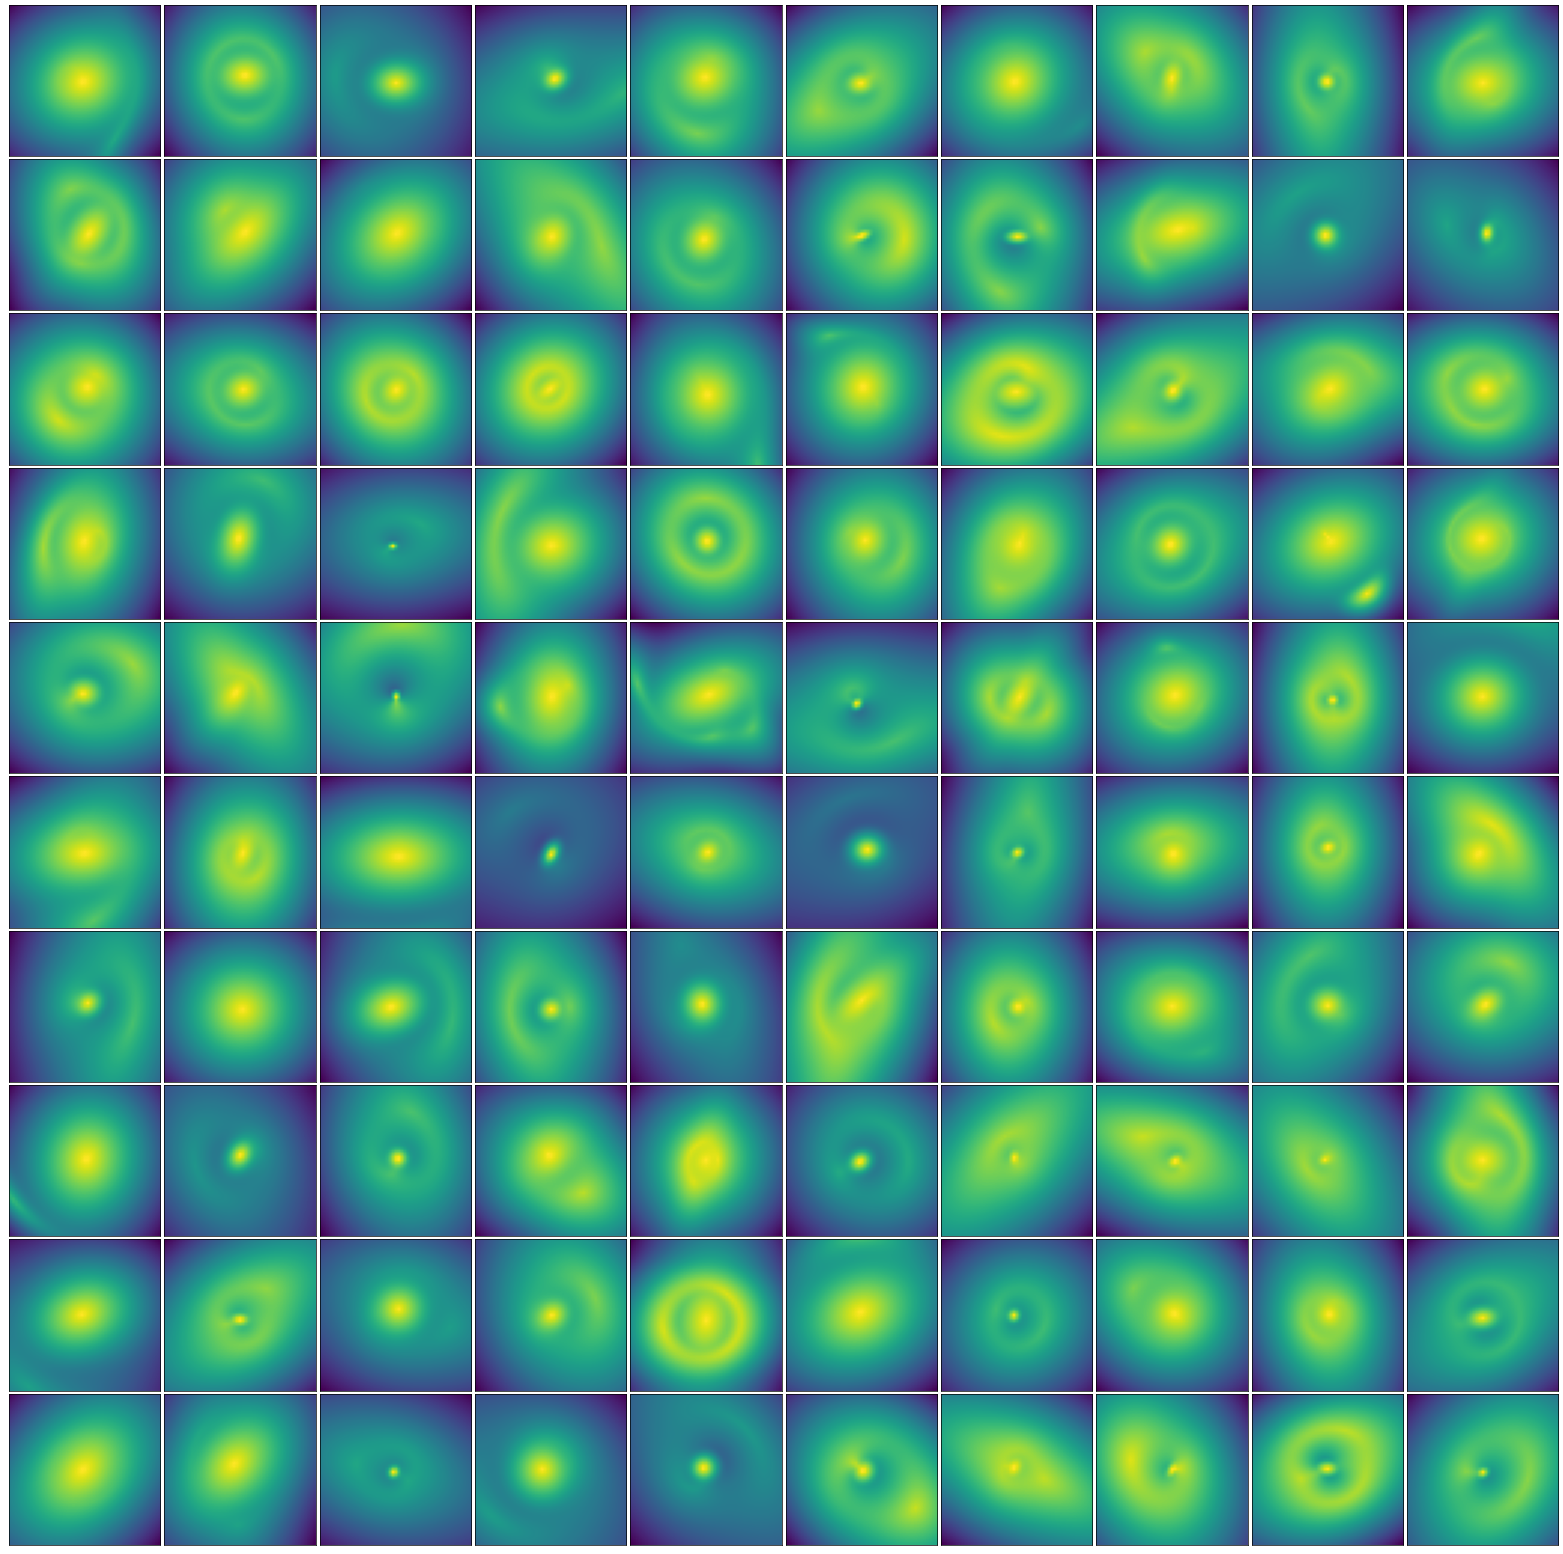

In [7]:
save_path = os.path.join(figure_dir, 'mosaic_models.png')
plot.plot_grid(model_list, side=10, log10=True, save=save_path)

In [8]:
pandeia_dir = os.path.join(array_dir, 'skypy_output')
pandeia_images = [np.load(i) for i in glob(pandeia_dir + '/pandeia_*')]

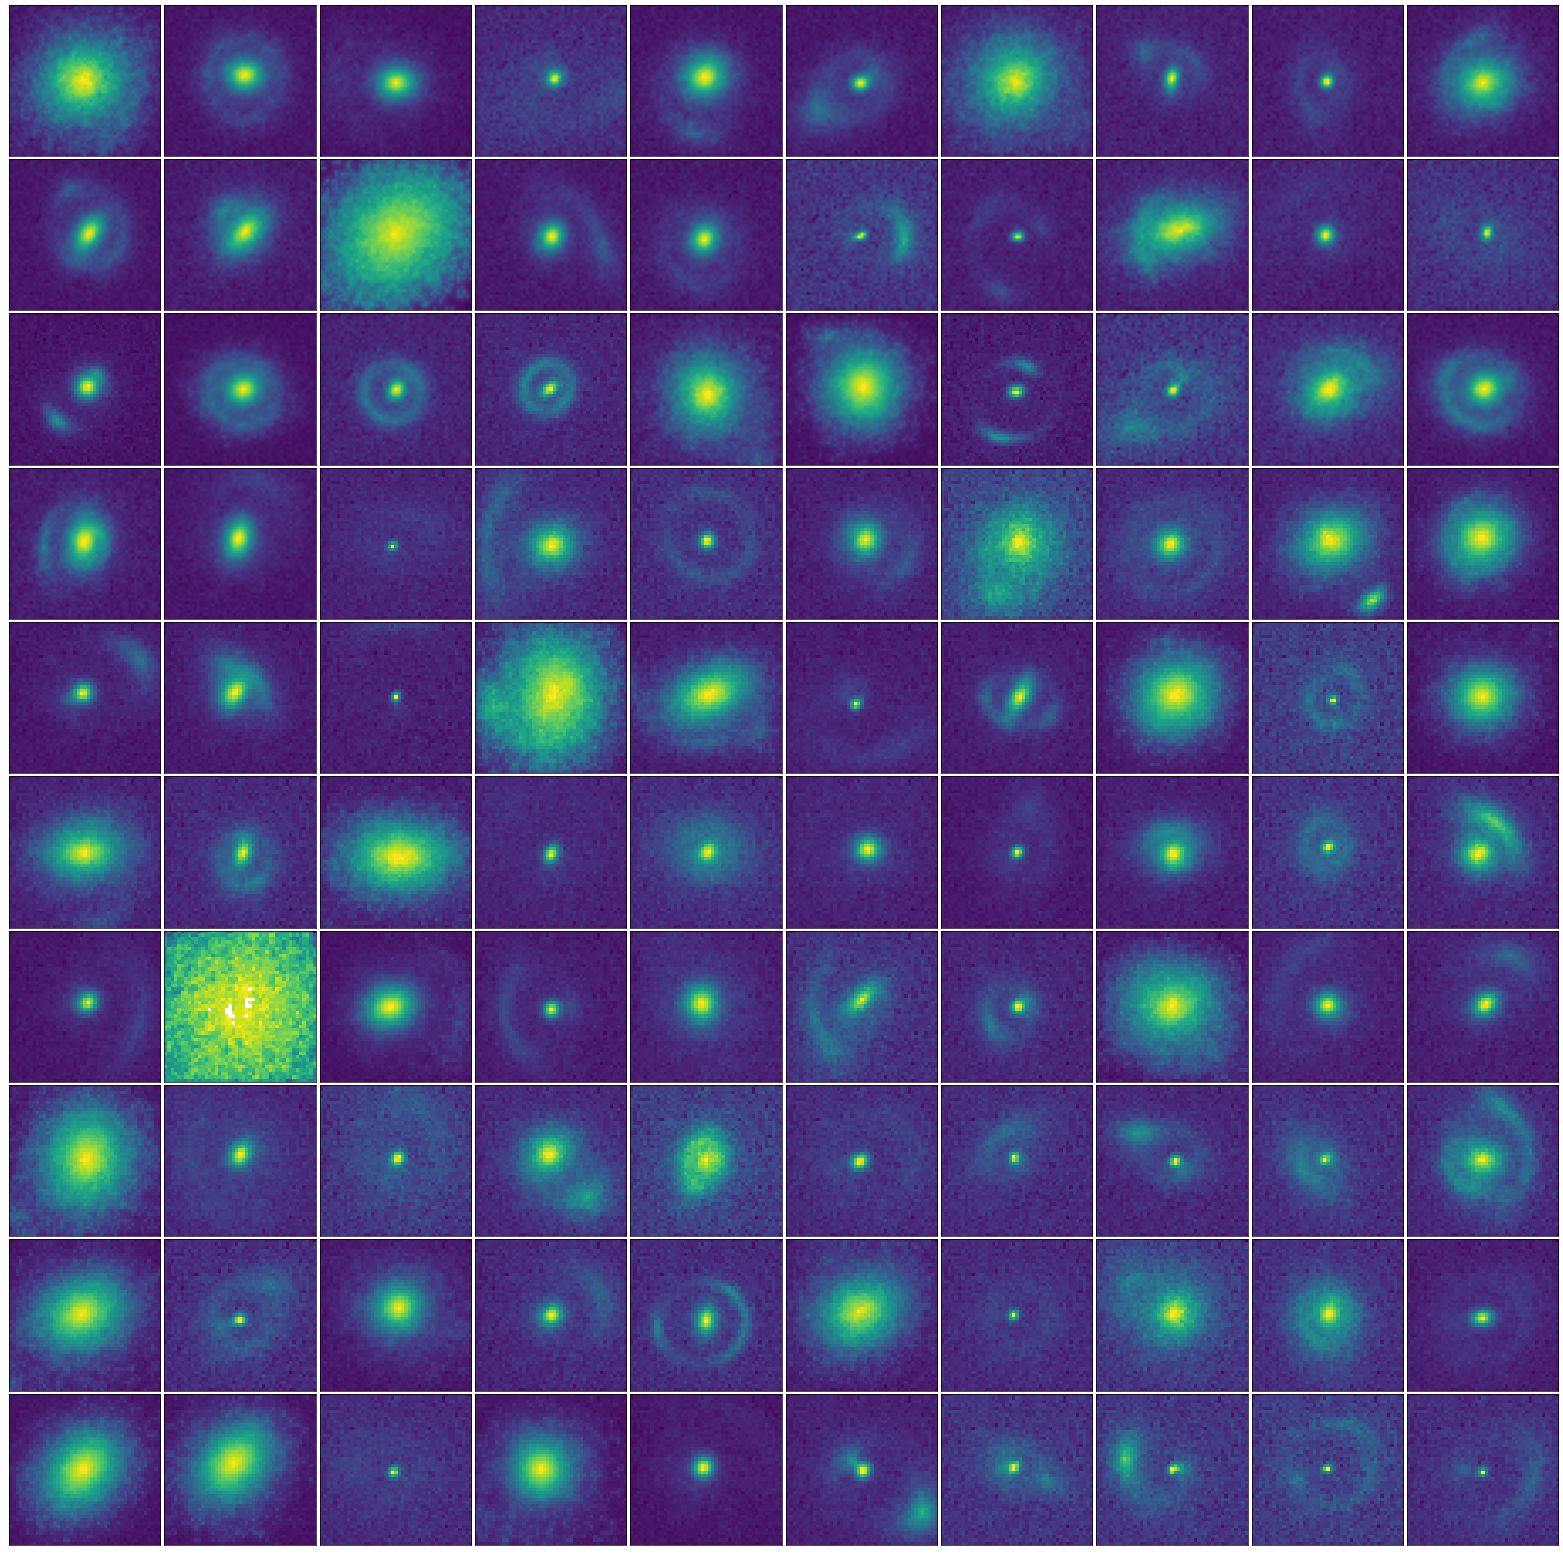

In [9]:
save_path = os.path.join(figure_dir, 'mosaic_pandeia.png')
plot.plot_grid(pandeia_images, side=10, log10=True, save=save_path)

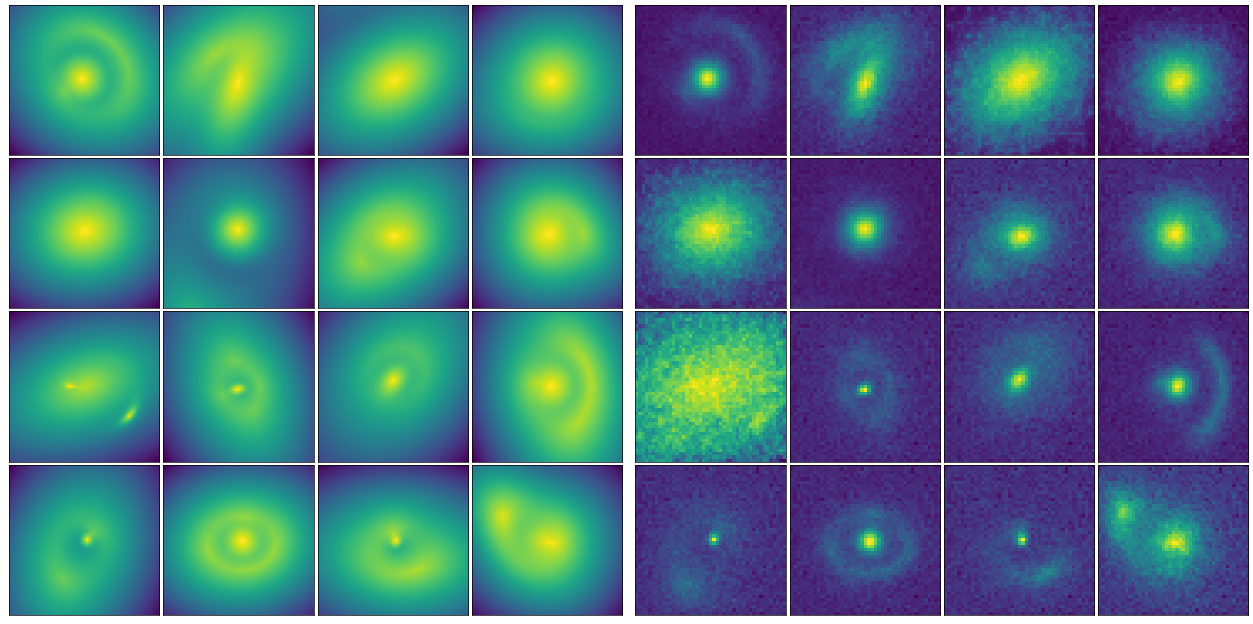

In [10]:
fig = plt.figure(figsize=(16, 16))
outer_grid = fig.add_gridspec(2, 2, wspace=0.02, hspace=0.02)

grid = 4

import random
np.random.seed(config.seed)
random_indices = random.sample(range(len(pandeia_images)), grid ** 2)

model_subset = [model_list[i] for i in random_indices]
pandeia_subset = [pandeia_images[i] for i in random_indices]

subsets = [model_subset, pandeia_subset]

for i, subset in enumerate(subsets):
    inner_grid = outer_grid[0, i].subgridspec(4, 4, wspace=0.02, hspace=0.02)
    ax = inner_grid.subplots()
    for i, image in enumerate(subset):
        ax[i // grid, i % grid].imshow(np.log10(image), cmap='viridis')
        ax[i // grid, i % grid].get_xaxis().set_visible(False)
        ax[i // grid, i % grid].get_yaxis().set_visible(False)

plt.savefig(os.path.join(figure_dir, 'mosaic.png'))
plt.show()